# Experimental Results on the COVID19 data

## Import of the libraries and our package

In [1]:
import numpy as np
import numpy.linalg as npl
import numpy.random as npr

import scipy as sp
import scipy.linalg as spl
import scipy.stats as sps
import time
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from covid import * #allows us to use our functions directly

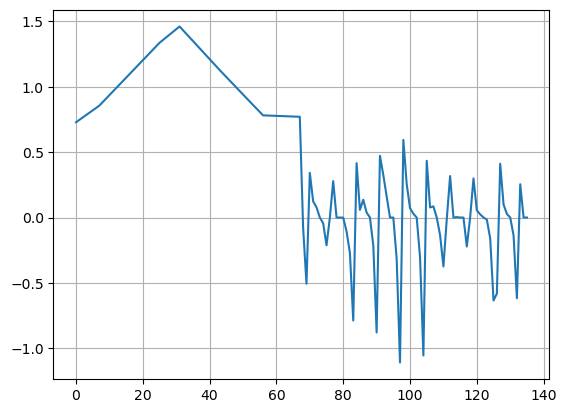

In [3]:
plt.figure()
map = PD3S('stuff/Z.csv', 'stuff/Phi.csv')
plt.plot(map)
plt.grid()